In [1]:
# Installation cell
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget 'https://julialang-s3.julialang.org/bin/linux/x64/1.5/julia-1.5.0-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
fi
julia -e 'using Pkg; pkg"add IJulia; precompile;"'
echo 'Done'

--2020-12-03 02:35:13--  https://julialang-s3.julialang.org/bin/linux/x64/1.5/julia-1.5.0-linux-x86_64.tar.gz
Resolving julialang-s3.julialang.org (julialang-s3.julialang.org)... 151.101.2.49, 151.101.66.49, 151.101.130.49, ...
Connecting to julialang-s3.julialang.org (julialang-s3.julialang.org)|151.101.2.49|:443... connected.
HTTP request sent, awaiting response... 302 gce internal redirect trigger
Location: https://storage.googleapis.com/julialang2/bin/linux/x64/1.5/julia-1.5.0-linux-x86_64.tar.gz [following]
--2020-12-03 02:35:13--  https://storage.googleapis.com/julialang2/bin/linux/x64/1.5/julia-1.5.0-linux-x86_64.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105098627 (100M) [application/x-tar]
Saving to: ‘/tmp/julia.tar.gz’

/tmp/julia.tar.gz   100%[=========

After you run the first cell (the the cell directly above this text), go to Colab's menu bar and select **Edit** and select **Notebook settings** from the drop down. Select *Julia 1.5.0* as the runtime and *GPU* as the hadware accelerator.

<br/>You should see somthing like this:

> ![Colab Img](https://drive.google.com/uc?id=1D6j-YN24VrsRXlGQ6dZPPrbTCTXk5SfN)
<br/>Click on SAVE
<br/>**We are ready to get going**





In [1]:
VERSION

v"1.5.0"

In [2]:
import Pkg

In [3]:
Pkg.add("Word2Vec")

   Updating registry at `~/.julia/registries/General`
  Resolving package versions...
  Installed Word2Vec_jll ─ v0.1.0+0
  Installed Word2Vec ───── v0.5.3
######################################################################### 100.0%
Updating `~/.julia/environments/v1.5/Project.toml`
  [c64b6f0f] + Word2Vec v0.5.3
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [c64b6f0f] + Word2Vec v0.5.3
  [9fbe4022] + Word2Vec_jll v0.1.0+0
  [37e2e46d] + LinearAlgebra
  [2f01184e] + SparseArrays
  [10745b16] + Statistics


In [4]:
Pkg.add("Gadfly")

  Resolving package versions...
  Installed WoodburyMatrices ───────────── v0.5.3
  Installed DocStringExtensions ────────── v0.8.3
  Installed Adapt ──────────────────────── v2.3.0
  Installed OffsetArrays ───────────────── v1.4.0
  Installed Grisu ──────────────────────── v1.0.0
  Installed Rmath ──────────────────────── v0.6.1
  Installed Distances ──────────────────── v0.10.0
  Installed Gadfly ─────────────────────── v1.3.1
  Installed Media ──────────────────────── v0.5.0
  Installed Juno ───────────────────────── v0.8.4
  Installed SpecialFunctions ───────────── v0.10.3
  Installed Hexagons ───────────────────── v0.2.0
  Installed OrderedCollections ─────────── v1.3.2
  Installed Requires ───────────────────── v1.1.1
  Installed Missings ───────────────────── v0.4.4
  Installed StaticArrays ───────────────── v0.12.5
  Installed Contour ────────────────────── v0.5.6
  Installed Ratios ─────────────────────── v0.4.0
  Installed KernelDensity ──────────────── v0.6.2
  Installed Ite

In [5]:
using Word2Vec, Gadfly

┌ Info: Precompiling Word2Vec [c64b6f0f-98cd-51d1-af78-58ae84944834]
└ @ Base loading.jl:1278
┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1278


**Opening the text file and making a text vector file in which every word is represented by a number**

In [6]:
word2vec("text8", "text8-vec.txt", verbose=true)

Starting training using file text8
Vocab size: 27172
Words in train file: 2901992
Alpha: 0.000002  Progress: 100.23%  Words/thread/sec: 404.06k  

Process(`/root/.julia/artifacts/0c86f7feb8f6b4ab5f9fb793f1fde1278e3a6021/bin/word2vec -train text8 -output text8-vec.txt -size 100 -window 5 -sample 0.001 -hs 0 -negative 5 -threads 12 -iter 5 -min-count 5 -alpha 0.025 -debug 2 -binary 0 -cbow 1`, ProcessExited(0))

**This code is to make a file called text8phrase.**

In [7]:
word2phrase("text8", "text8phrase")
word2vec("text8phrase", "text8phrase-vec.txt", verbose=true)

tcmalloc: large alloc 2000003072 bytes == 0x15f8000 @  0x7fdaa5492001 0x400b68 0x7fdaa4ad0bf7 0x400c43


Starting training using file text8

Vocab size (unigrams + bigrams): 2144399
Words in train file: 14492264
Starting training using file text8phrase
Vocab size: 88413
Words in train file: 13509296
Alpha: 0.000002  Progress: 100.05%  Words/thread/sec: 386.49k  

Process(`/root/.julia/artifacts/0c86f7feb8f6b4ab5f9fb793f1fde1278e3a6021/bin/word2vec -train text8phrase -output text8phrase-vec.txt -size 100 -window 5 -sample 0.001 -hs 0 -negative 5 -threads 12 -iter 5 -min-count 5 -alpha 0.025 -debug 2 -binary 0 -cbow 1`, ProcessExited(0))

**This code is to make a cluster file in which every code will be given a index number.**

In [8]:
word2clusters("text8", "text8-class.txt", 100)


Starting training using file text8
Vocab size: 65191
Words in train file: 14231248
Alpha: 0.020007  Progress: 19.99%  Words/thread/sec: 343.35k  

Process(`/root/.julia/artifacts/0c86f7feb8f6b4ab5f9fb793f1fde1278e3a6021/bin/word2vec -train text8 -output text8-class.txt -size 100 -window 5 -sample 0.0 -hs 0 -negative 5 -threads 1 -iter 5 -min-count 5 -alpha 0.025 -debug 2 -binary 0 -cbow 1 -classes 100`, ProcessExited(0))

**Now its time to perfrom some modelling**

In [9]:
;ls

sample_data
text8
text8-class.txt
text8phrase
text8phrase-vec.txt
text8-vec.txt


**Makiing a model**

In [15]:
model = wordvectors("text8-vec.txt")

WordVectors 27172 words, 100-element Float64 vectors

In [11]:
size(model)

(100, 27172)

In [13]:
words = vocabulary(model)

27172-element Array{String,1}:
 "</s>"
 "the"
 "of"
 "and"
 "in"
 "one"
 "a"
 "to"
 "zero"
 "nine"
 "is"
 "two"
 "as"
 ⋮
 "soundex"
 "shakta"
 "fanu"
 "corces"
 "echinus"
 "adenylate"
 "cimabue"
 "minniti"
 "caravaggisti"
 "gentileschi"
 "prestwich"
 "mousepad"

**Finding out how many words are similar to love**

In [16]:
idx = index(model, "love")

702

In [17]:
words[idx]

"love"

**Finding the point for words similar to son**

In [18]:
get_vector(model,"son")

100-element Array{Float64,1}:
 -0.07605775833921728
  0.05554317498138358
  0.041870892208249945
 -0.2049525295138467
  0.002875113688611808
  0.11744093681220638
  0.06157824158304747
  0.04287171452645962
  0.06709470370188979
  0.16065965108580516
  0.16121028339891974
  0.05654323924443838
 -0.10963979121349723
  ⋮
  0.07946076268629776
  0.10093182213578158
 -0.05265498484135035
  0.07608609065063035
 -0.18608908504020197
  0.06465746162210652
  0.15610326582059855
  0.021214931564034027
 -0.08143672820434608
 -0.06835241196070413
 -0.27266514292384536
  0.020277785878832957

**Finding the similarity between 2 words for example son and daughter**

In [19]:
similarity(model, "son", "daughter")

0.9398814174219126

**Finding the similarity between son and something as random as soccer. The result when compared to the one above will that they are very dissimilar**

In [20]:
similarity(model, "son", "soccer")

0.19494015264946568

**Now im going to find points of the 15 most similar words to soccer and plot them**

In [21]:
idxs, dists = cosine(model, "soccer", 15)

([5814, 3846, 3891, 506, 4504, 3732, 2497, 1101, 3870, 2670, 6251, 6553, 3359, 14540, 7316], [1.0, 0.9303189216309172, 0.8807379936662074, 0.8782186773862362, 0.8761307760630882, 0.8650937852658243, 0.8565619552187173, 0.8487778889256028, 0.8487231267375317, 0.8294811698079312, 0.8272456643825032, 0.8226593518740992, 0.8226467704704772, 0.8203931317103552, 0.8190034393363287])

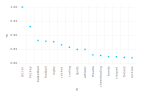

In [22]:
plot(x=words[idxs], y=dists)

ANALOGY SECTION
In this section ill be computing the similarities between words. For example husband - man + wife = woman for example> Ill also plot the result 

In [23]:
indxs, dists = analogy(model, ["king", "queen"], ["man"], 10)

([4526, 777, 873, 1820, 4501, 964, 2677, 3033, 2524, 3401], [0.4216602954876769, 0.41910556065312404, 0.41809677391673783, 0.41685971229117186, 0.4136041081105618, 0.41330350026964036, 0.41265923547539785, 0.4102532423609002, 0.40983272913874774, 0.4085543845813344])

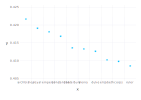

In [24]:
plot(x=words[indxs], y=dists)

**we can also repeat the section above using analogy words which will suggest similar**

In [25]:
analogy_words(model, ["husband", "wife"], ["man"], 10)

10-element Array{String,1}:
 "brother"
 "colleague"
 "cousin"
 "qimei"
 "niece"
 "uncle"
 "sons"
 "daughter"
 "daughters"
 "cicero"

In [26]:
analogy_words(model, ["england", "italy"], ["london"], 10)

10-element Array{String,1}:
 "spain"
 "germany"
 "britain"
 "rome"
 "russia"
 "france"
 "greece"
 "romans"
 "rebellion"
 "invaded"

**Finding out similar phrase usinf the phrase to vec txt**

In [27]:
model2 = wordvectors("text8phrase-vec.txt")

WordVectors 88413 words, 100-element Float64 vectors

**Now im going to use the cosine similar function to find the similar words between words similar to las vegas**

In [28]:
cosine_similar_words(model2, "las_vegas", 13)

13-element Array{String,1}:
 "las_vegas"
 "san_diego"
 "san_francisco"
 "atlanta"
 "seattle"
 "los_angeles"
 "dallas"
 "miami"
 "hotel"
 "melbourne"
 "chicago_illinois"
 "st_louis"
 "cleveland"

**Now im going to try it for a phrase that doesnt exist and it will show that the word cant be found i the song**

In [29]:
cosine_similar_words(model2, "new_england", 13)

LoadError: ignored

**CLUSTERING**

In [30]:
model3 = wordclusters("text8-class.txt")

WordClusters 65191 words, 100 clusters

In [31]:
clusters(model3)

100-element Array{Int64,1}:
  0
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
  ⋮
 88
 89
 90
 91
 92
 93
 94
 95
 96
 97
 98
 99

**We can use the function above to return the cluster ID of a given word for example london, paris, italy**

In [32]:
get_cluster(model3, "london")

86

In [33]:
get_cluster(model3, "paris")

87

In [34]:
get_cluster(model3, "italy")

63

**We can also find out the cluster ID that are similar to words for example im going to use london which is index 86**

In [35]:
get_words(model3, 86)

149-element Array{String,1}:
 "university"
 "york"
 "house"
 "school"
 "home"
 "london"
 "college"
 "press"
 "royal"
 "california"
 "county"
 "park"
 "washington"
 ⋮
 "stonyhurst"
 "northfield"
 "pusey"
 "feliz"
 "jasenovac"
 "cornhuskers"
 "albertson"
 "swarthmore"
 "brixham"
 "benning"
 "mullen"
 "kennett"

In [36]:
get_words(model3, 35)

304-element Array{String,1}:
 "see"
 "isbn"
 "references"
 "est"
 "births"
 "http"
 "www"
 "na"
 "jpg"
 "pp"
 "vol"
 "html"
 "iso"
 ⋮
 "cotopaxi"
 "escwa"
 "peloza"
 "scaleminor"
 "pinkerton"
 "biologie"
 "bivouac"
 "wissenschaftslehre"
 "frogmen"
 "guettard"
 "westfall"
 "icehenge"

**TEXT ANALYSIS & NATURAL LANGUAGE PROCESSING**

In [37]:
Pkg.add("TextAnalysis")

  Resolving package versions...
  Installed IniFile ───────────────────── v0.5.0
  Installed InvertedIndices ───────────── v1.0.0
  Installed PooledArrays ──────────────── v0.5.3
  Installed StrTables ─────────────────── v1.0.1
  Installed IteratorInterfaceExtensions ─ v1.0.0
  Installed DataDeps ──────────────────── v0.7.4
  Installed TextAnalysis ──────────────── v0.7.1
  Installed DataFrames ────────────────── v0.21.8
  Installed Snowball_jll ──────────────── v2.0.0+0
  Installed Snowball ──────────────────── v0.1.0
  Installed DataValueInterfaces ───────── v1.0.0
  Installed TableTraits ───────────────── v1.0.0
  Installed Tables ────────────────────── v1.2.1
  Installed URIs ──────────────────────── v1.1.0
  Installed HTML_Entities ─────────────── v1.0.0
  Installed Languages ─────────────────── v0.4.3
  Installed WordTokenizers ────────────── v0.5.6
  Installed HTTP ──────────────────────── v0.9.0
######################################################################### 100.0%
Up

In [39]:
Pkg.add("WordTokenizers")

  Resolving package versions...
Updating `~/.julia/environments/v1.5/Project.toml`
  [796a5d58] + WordTokenizers v0.5.6
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [41]:
using TextAnalysis, WordTokenizers

┌ Info: Precompiling TextAnalysis [a2db99b7-8b79-58f8-94bf-bbc811eef33d]
└ @ Base loading.jl:1278


**Readind the text8 document as a string. This way we can know what the file consists of and ehat language is used to write it.**

In [46]:
fd = FileDocument("text8")

A FileDocument
 * Language: Languages.English()
 * Title: text8
 * Author: Unknown Author
 * Timestamp: Unknown Time
 * Snippet:  anarchism originated as a term of abuse first use

Tokenization with Txt Analysis
The means we are spilt the sentences into words in order to make feature from it if we choose too.

In [48]:
tokens(fd)

14492265-element Array{String,1}:
 "anarchism"
 "originated"
 "as"
 "a"
 "term"
 "of"
 "abuse"
 "first"
 "used"
 "against"
 "early"
 "working"
 "class"
 ⋮
 "extensively"
 "excavated"
 "in"
 "one"
 "nine"
 "six"
 "three"
 "one"
 "nine"
 "six"
 "five"
 "b"

**Now im going to to Tokenize a string with WordTokenizer**

In [49]:
using WordTokenizers

In [50]:
tokenize("My name is Divine and I am from Nigeria")

9-element Array{String,1}:
 "My"
 "name"
 "is"
 "Divine"
 "and"
 "I"
 "am"
 "from"
 "Nigeria"

**Now im going to token a text file i made in order to analyse it.**

In [54]:
myfiles = FileDocument("docker instructions.txt")

A FileDocument
 * Language: Languages.English()
 * Title: docker instructions.txt
 * Author: Unknown Author
 * Timestamp: Unknown Time
 * Snippet: First step is to build a docker build on your loca

In [55]:
text(myfiles)

"First step is to build a docker build on your local machine . Then run the docker in a container and check if its working. After that I pushed the docker file to my GitHub repo. The next was to create a VM instance on google cloud console and specify the machine requirements to your needs. After that I opened the terminal on the google console then I cloned my repo from GitHub. Then I checked to see if the docker file was on my repo. After that Installed the docker certificates on the cloud shell. Then you get the docker form the remote repo, build it and run docker. After doing that cloud shell will give you your ip address which should be running your app.  "

Tokenizing the sentences in the file

In [56]:
split_sentences(text(myfiles))

10-element Array{SubString{String},1}:
 "First step is to build a docker build on your local machine ."
 "Then run the docker in a container and check if its working."
 "After that I pushed the docker file to my GitHub repo."
 "The next was to create a VM instance on google cloud console and specify the machine requirements to your needs."
 "After that I opened the terminal on the google console then I cloned my repo from GitHub."
 "Then I checked to see if the docker file was on my repo."
 "After that Installed the docker certificates on the cloud shell."
 "Then you get the docker form the remote repo, build it and run docker."
 "After doing that cloud shell will give you your ip address which should be running your app."
 " "

**This function tell you how many times a world was used**

In [58]:
ngrams(myfiles)

Dict{String,Int64} with 72 entries:
  "build"        => 3
  "pushed"       => 1
  "instance"     => 1
  "cloned"       => 1
  "was"          => 2
  "give"         => 1
  "doing"        => 1
  "step"         => 1
  "create"       => 1
  "that"         => 4
  "will"         => 1
  "."            => 2
  "opened"       => 1
  "VM"           => 1
  "google"       => 2
  "running"      => 1
  "certificates" => 1
  "to"           => 5
  "working."     => 1
  "requirements" => 1
  "is"           => 1
  "and"          => 3
  "First"        => 1
  "address"      => 1
  "GitHub"       => 1
  ⋮              => ⋮